In [1]:
import xarray as xr

In [12]:
import xarray as xr
file = '/Users/mikesmith/Documents/2018_codar_reprocess/nc/RU_MARA_2017_01_aggregated.nc'

ds = xr.open_dataset(file)
# ax1.set_extent([-76.5, -73, 37, 34])
tds = ds.sel(time='2017-01-01T01:00:00', z=0)
# tds = temp.sel(
#     lon=(temp.lon > -76.5) & (temp.lon < -73),
#     lat=(temp.lat < 37) & (temp.lat > 34),
# )
import numpy.ma as ma

u = tds['u'].data
v = tds['v'].data

lon = tds.coords['lon'].data
lat = tds.coords['lat'].data
time = tds.coords['time'].data

u = ma.masked_invalid(u)
v = ma.masked_invalid(v)

import numpy as np
from oceans import uv2spdir, spdir2uv

angle, speed = uv2spdir(u, v)
# speed = np.sqrt(np.square(u) + np.square(v))
us, vs = spdir2uv(np.ones_like(speed), angle, deg=True)

lons, lats = np.meshgrid(lon, lat)

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

LAND = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='face',
    facecolor='tan'
)

state_lines = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

speed_clipped = np.clip(speed, 0, 60)

fig = plt.figure()
fig, (ax1) = plt.subplots(1, 1,
                          figsize=(20, 24),
                          subplot_kw=dict(projection=ccrs.PlateCarree()))

ax1.set_extent([-76.5, -73, 37, 34])
gl = ax1.gridlines(draw_labels=True,
                   linewidth=2,
                   # color='gray',
                   alpha=0.5, linestyle='--')
gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax1.add_feature(LAND, zorder=0, edgecolor='black')
ax1.add_feature(cfeature.LAKES)
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(state_lines, edgecolor='black')
# ax1.hexbin(lons.flatten(), lats.flatten(), speed.flatten(), gridsize=(30,30), vmax=60, vmin=0, cmap='jet')

ax1.pcolormesh(lon, lat, speed, cmap='jet', shading='gouraud', interpolate_grids=True)
cb = ax1.quiver(lons, lats,
                us, vs,
                # speed_clipped,
                cmap='jet',
                scale=55)

AttributeError: Unknown property interpolate_grids

<Figure size 432x288 with 0 Axes>

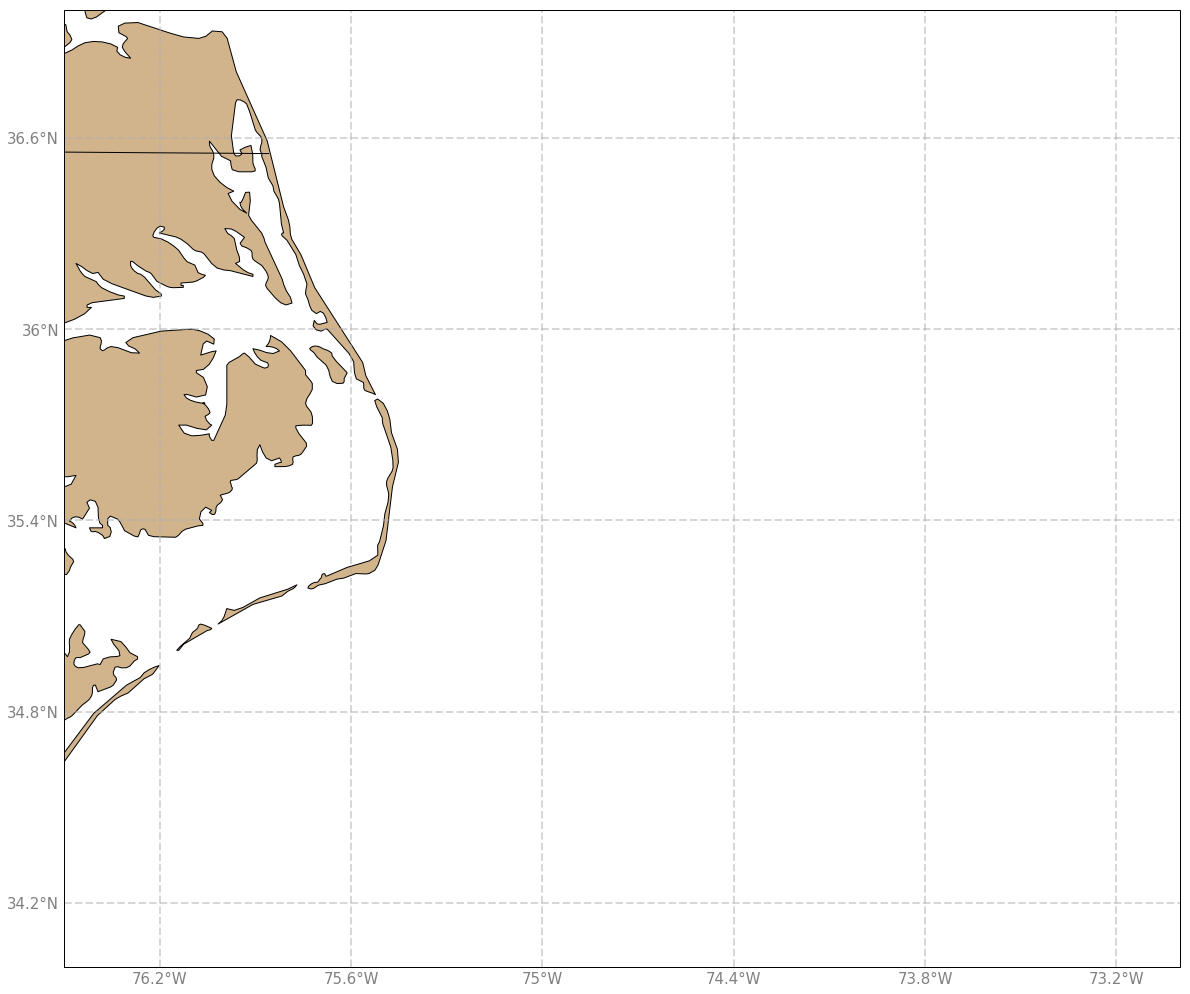

In [25]:
%matplotlib inline


# plt.colorbar(cb, orientation='vertical', ticklocation='auto')



# ax2.set_extent([-76.5, -73, 37, 34])
# gl = ax2.gridlines(draw_labels=True)
# gl.xlabels_top = gl.ylabels_right = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER

# ax2.add_feature(LAND, zorder=0, edgecolor='black')
# ax2.add_feature(cfeature.LAKES)
# ax2.add_feature(cfeature.BORDERS)
# ax2.add_feature(state_lines, edgecolor='black')

# ax2.quiver(lon[::sub], lat[::sub],
#            us[::sub, ::sub], vs[::sub, ::sub],
#            speed_clipped,
#            regrid_shape=(70, 70),
#            scale=40)

In [18]:
lons.shape

(187, 196)

In [19]:
lats.shape


(187, 196)

In [20]:
speed.shape

(187, 196)